In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [10]:

df = pd.read_csv('../ml/test1.csv',encoding='latin1')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [18]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   int64  
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   float64
 12  Price_euros       1303 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 132.5+ KB


In [62]:

le = LabelEncoder()

# Encode 'Company', 'Product', 'TypeName', and 'OpSys' columns
df['Company'] = le.fit_transform(df['Company'])
df['Product'] = le.fit_transform(df['Product'])
df['TypeName'] = le.fit_transform(df['TypeName'])
df['OpSys'] = le.fit_transform(df['OpSys'])
df['Gpu'] = le.fit_transform(df['Gpu'])




In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   int64  
 2   Product           1303 non-null   int64  
 3   TypeName          1303 non-null   int64  
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   int64  
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   float64
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   int64  
 10  OpSys             1303 non-null   int64  
 11  Weight            1303 non-null   float64
 12  Price_euros       1303 non-null   float64
dtypes: float64(4), int64(7), object(2)
memory usage: 132.5+ KB


In [64]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,1,300,4,13.3,23,Intel Core i5 2.3GHz,8.0,128GB SSD,51,8,1.37,1339.69
1,2,1,301,4,13.3,1,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,44,8,1.34,898.94
2,3,7,50,3,15.6,8,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,46,4,1.86,575.00
3,4,1,300,4,15.4,25,Intel Core i7 2.7GHz,10.0,512GB SSD,2,8,1.83,2537.45
4,5,1,300,4,13.3,23,Intel Core i5 3.1GHz,8.0,256GB SSD,52,8,1.37,1803.60


In [27]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,1,300,4,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,58,8,1.37,1339.69
1,2,1,301,4,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,51,8,1.34,898.94
2,3,7,50,3,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,53,4,1.86,575.00
3,4,1,300,4,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,9,8,1.83,2537.45
4,5,1,300,4,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,59,8,1.37,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,10,580,0,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,47,5,1.80,638.00
1299,1317,10,588,0,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,47,5,1.30,1499.00
1300,1318,10,196,3,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,40,5,1.50,229.00
1301,1319,7,2,3,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,21,5,2.19,764.00


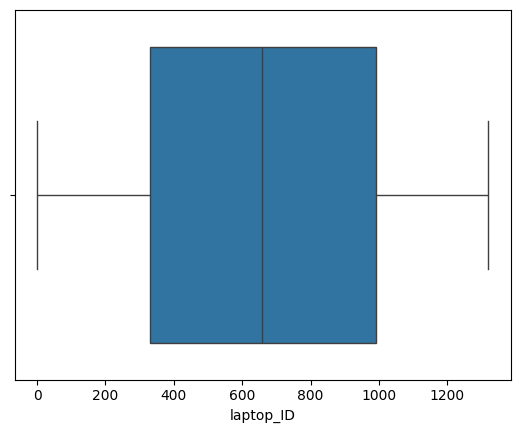

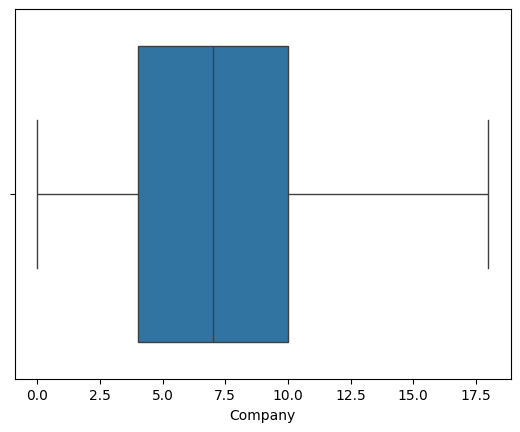

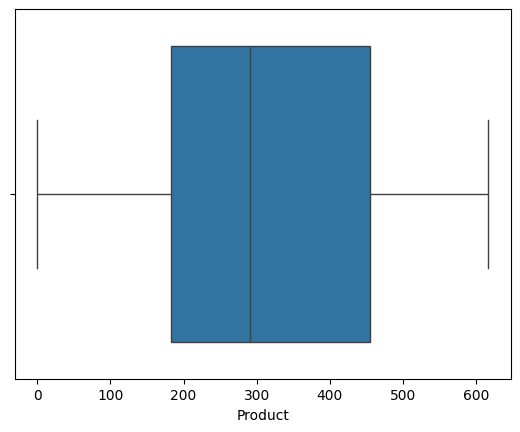

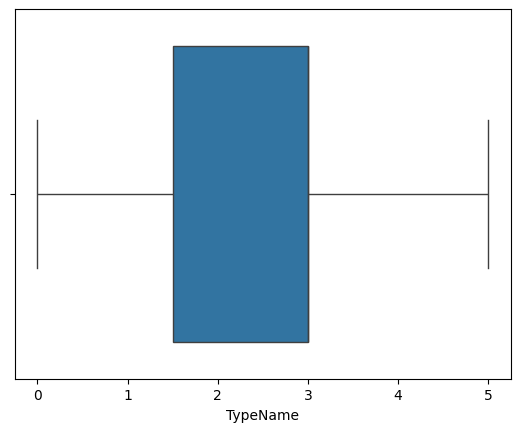

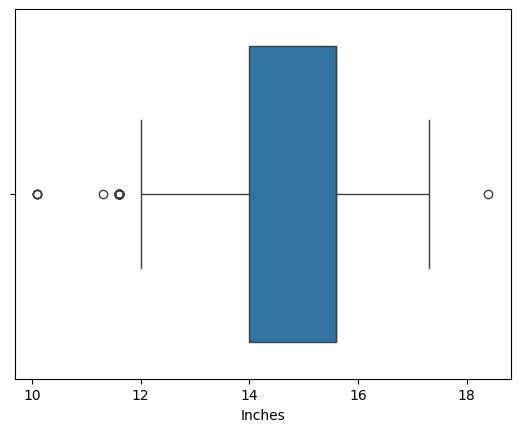

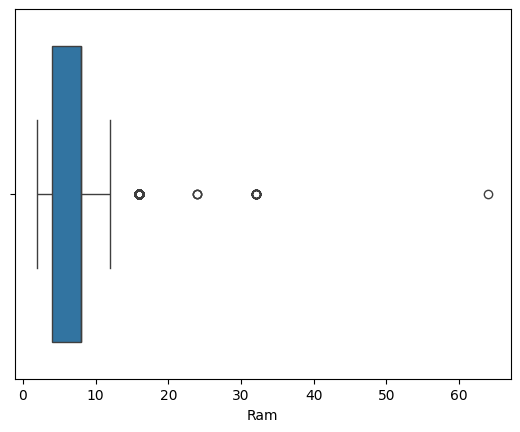

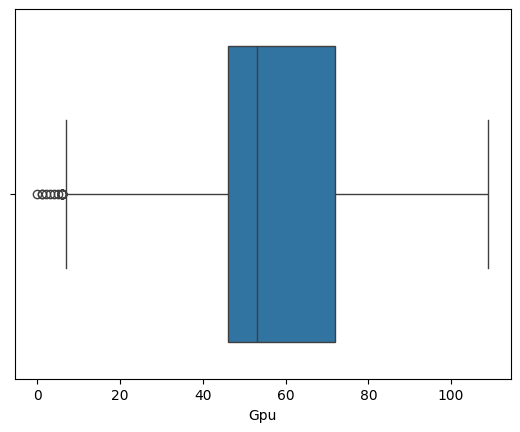

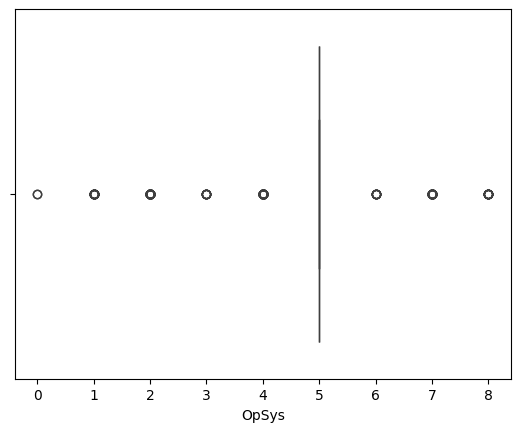

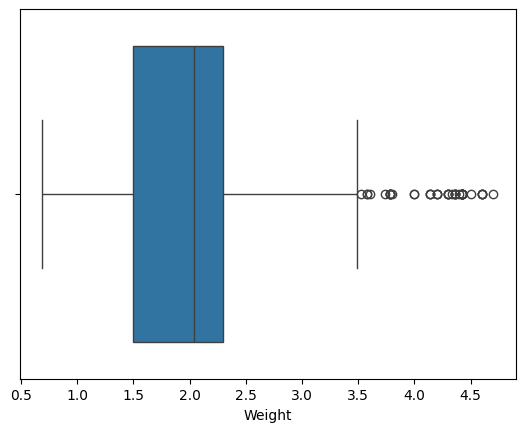

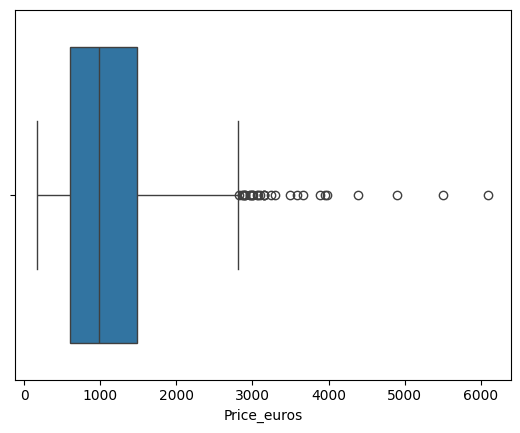

In [28]:
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [30]:
# inch ra gpu weughr

def wisker(col):
    q1,q3 = np.percentile(col,[25,75])
    iqr = q3 - q1
    lw = q1 - 1.5*iqr
    uw = q1 + 1.5*iqr
    return lw,uw
       
for i in ["Inches","Weight","Gpu","Ram"]:
    lw,uw = wisker(df[i])
    df[i]=np.where(df[i] < lw,lw,df[i])
    df[i]=np.where(df[i] > uw,uw,df[i])

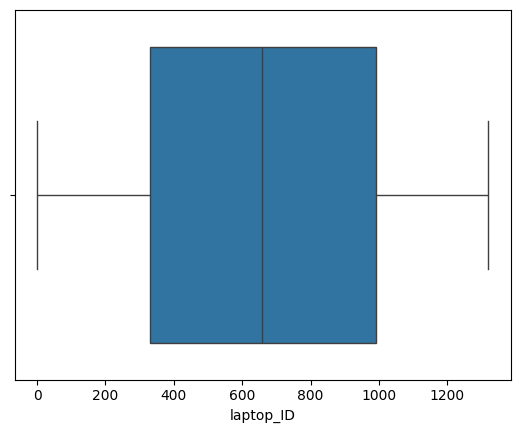

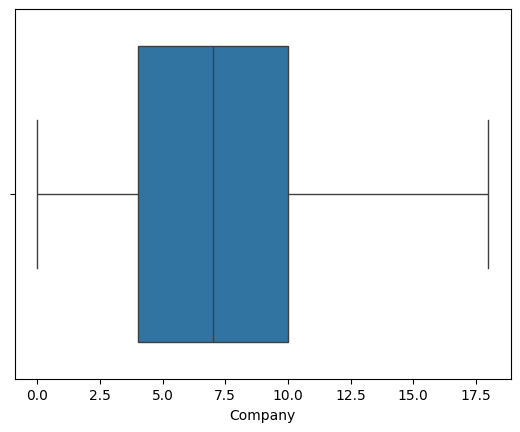

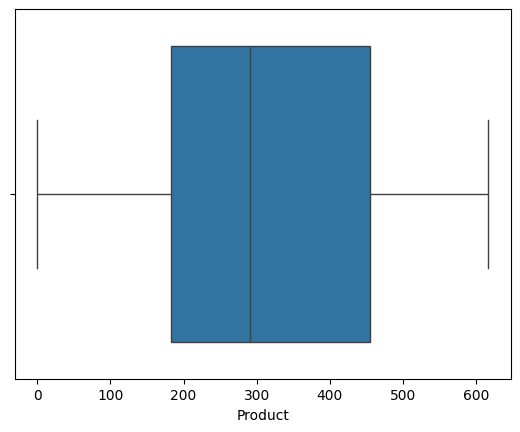

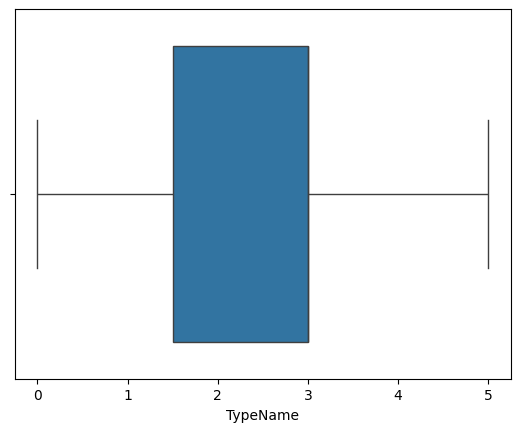

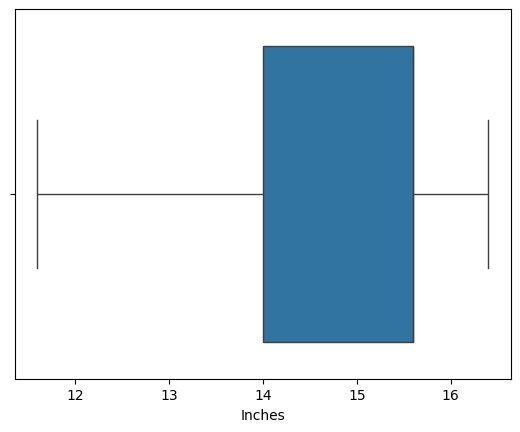

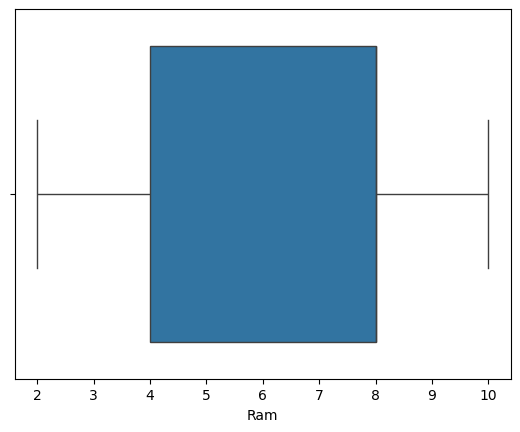

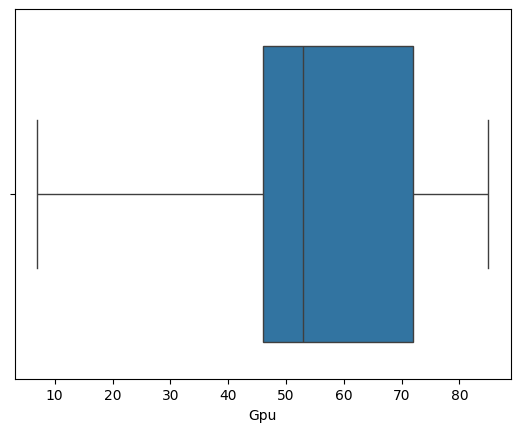

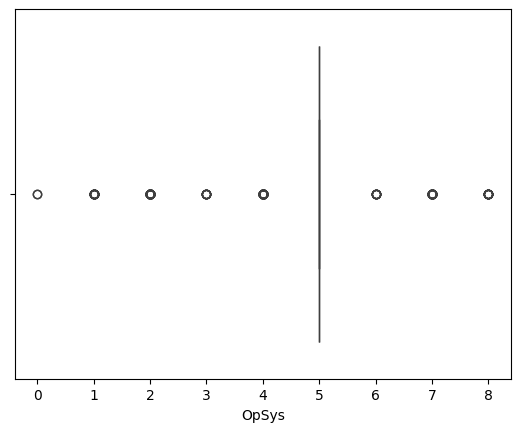

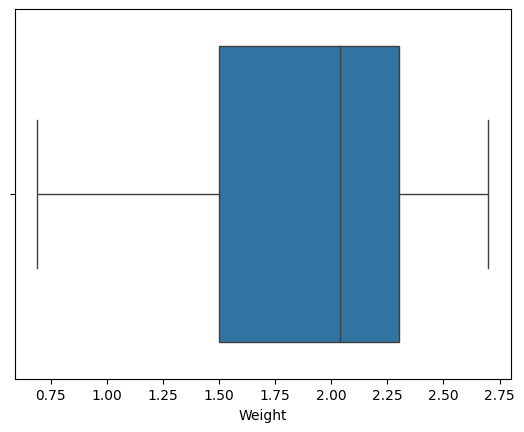

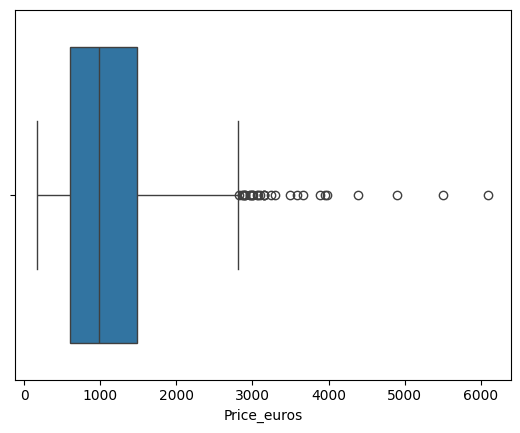

In [31]:
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [33]:
df.duplicated().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   int64  
 2   Product           1303 non-null   int64  
 3   TypeName          1303 non-null   int64  
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   float64
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   float64
 10  OpSys             1303 non-null   int64  
 11  Weight            1303 non-null   float64
 12  Price_euros       1303 non-null   float64
dtypes: float64(5), int64(5), object(3)
memory usage: 132.5+ KB


In [37]:
data = pd.get_dummies(data=df,columns=["ScreenResolution","Cpu","Memory"],drop_first=True)
data

,laptop_ID,Company,Product,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price_euros,...,Memory_512GB SSD,Memory_512GB SSD + 1.0TB Hybrid,Memory_512GB SSD + 1TB HDD,Memory_512GB SSD + 256GB SSD,Memory_512GB SSD + 2TB HDD,Memory_512GB SSD + 512GB SSD,Memory_64GB Flash Storage,Memory_64GB Flash Storage + 1TB HDD,Memory_64GB SSD,Memory_8GB SSD
0,1,1,300,4,13.3,8.0,58.0,8,1.37,1339.69,...,False,False,False,False,False,False,False,False,False,False
1,2,1,301,4,13.3,8.0,51.0,8,1.34,898.94,...,False,False,False,False,False,False,False,False,False,False
2,3,7,50,3,15.6,8.0,53.0,4,1.86,575.00,...,False,False,False,False,False,False,False,False,False,False
3,4,1,300,4,15.4,10.0,9.0,8,1.83,2537.45,...,True,False,False,False,False,False,False,False,False,False
4,5,1,300,4,13.3,8.0,59.0,8,1.37,1803.60,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,10,580,0,14.0,4.0,47.0,5,1.80,638.00,...,False,False,False,False,False,False,False,False,False,False
1299,1317,10,588,0,13.3,10.0,47.0,5,1.30,1499.00,...,True,False,False,False,False,False,False,False,False,False
1300,1318,10,196,3,14.0,2.0,40.0,5,1.50,229.00,...,False,False,False,False,False,False,True,False,False,False
1301,1319,7,2,3,15.6,6.0,21.0,5,2.19,764.00,...,False,False,False,False,False,False,False,False,False,False


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Columns: 204 entries, laptop_ID to Memory_8GB SSD
dtypes: bool(194), float64(5), int64(5)
memory usage: 348.8 KB


In [38]:
X = data.drop("Price_euros", axis=1)
y = data["Price_euros"]
print(X)

      laptop_ID  Company  Product  TypeName  Inches   Ram   Gpu  OpSys  \
0             1        1      300         4    13.3   8.0  58.0      8   
1             2        1      301         4    13.3   8.0  51.0      8   
2             3        7       50         3    15.6   8.0  53.0      4   
3             4        1      300         4    15.4  10.0   9.0      8   
4             5        1      300         4    13.3   8.0  59.0      8   
...         ...      ...      ...       ...     ...   ...   ...    ...   
1298       1316       10      580         0    14.0   4.0  47.0      5   
1299       1317       10      588         0    13.3  10.0  47.0      5   
1300       1318       10      196         3    14.0   2.0  40.0      5   
1301       1319        7        2         3    15.6   6.0  21.0      5   
1302       1320        2      568         3    15.6   4.0  40.0      5   

      Weight  ScreenResolution_1440x900  ...  Memory_512GB SSD  \
0       1.37                      False  ... 

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print(X_train,X_test,y_train,y_test)
print(len(X_test))
print(len(X_train))

261
1042


In [40]:
model = LinearRegression()


In [41]:
model.fit(X_train, y_train)


LinearRegression()

In [42]:
y_pred = model.predict(X_test)


In [43]:
mae = mean_absolute_error(y_test, y_pred)
print(mae)

234.58715288681722


In [44]:
mse = mean_squared_error(y_test, y_pred)
print(mse)

129663.86059131587


In [45]:
r2 = r2_score(y_test, y_pred)
print(r2)

0.7447192570800844


In [ ]:
# end of end odd

In [ ]:
# ceefefefef

In [46]:
# le = LabelEncoder()
# encoded_df = df.copy()
# # Apply LabelEncoder to each of the categorical columns individually
# columns_to_encode = ["ScreenResolution","Cpu","Memory"]

# for column in columns_to_encode:
#     encoded_df[column] = le.fit_transform(df[column])

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   int64  
 2   Product           1303 non-null   int64  
 3   TypeName          1303 non-null   int64  
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   float64
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   float64
 10  OpSys             1303 non-null   int64  
 11  Weight            1303 non-null   float64
 12  Price_euros       1303 non-null   float64
dtypes: float64(5), int64(5), object(3)
memory usage: 132.5+ KB
